In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/amazon.csv")

In [ ]:
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
#Convert all non-numeric data into numeric
df['actual_price'].unique()

array(['₹1,099', '₹349', '₹1,899', '₹699', '₹399', '₹1,000', '₹499',
       '₹299', '₹999', '₹339', '₹799', '₹700', '₹899', '₹24,999',
       '₹21,990', '₹1,799', '₹22,900', '₹199', '₹19,990', '₹19,999',
       '₹1,999', '₹750', '₹599', '₹666.66', '₹1,900', '₹45,999', '₹695',
       '₹34,999', '₹1,599', '₹1,208', '₹475', '₹395', '₹2,199', '₹500',
       '₹2,100', '₹12,999', '₹1,399', '₹21,999', '₹1,499', '₹47,900',
       '₹845', '₹1,400', '₹14,990', '₹2,999', '₹42,999', '₹30,990',
       '₹3,999', '₹249', '₹19,125', '₹1,299', '₹39,999', '₹40,990',
       '₹52,900', '₹800', '₹31,999', '₹1,809', '₹29,999', '₹65,000',
       '₹20,000', '₹23,990', '₹15,999', '₹44,990', '₹44,999', '₹1,700',
       '₹595', '₹27,990', '₹1,200', '₹34,990', '₹1,500', '₹49,990',
       '₹931', '₹2,399', '₹1,339', '₹20,900', '₹15,990', '₹1,600', '₹849',
       '₹1,199', '₹22,990', '₹2,499', '₹47,990', '₹485', '₹18,990',
       '₹11,000', '₹70,900', '₹549', '₹35,999', '₹1,699', '₹31,990',
       '₹9,990', '₹16,99

In [ ]:
df['actual_price'].unique()

array(['₹1,099', '₹349', '₹1,899', '₹699', '₹399', '₹1,000', '₹499',
       '₹299', '₹999', '₹339', '₹799', '₹700', '₹899', '₹24,999',
       '₹21,990', '₹1,799', '₹22,900', '₹199', '₹19,990', '₹19,999',
       '₹1,999', '₹750', '₹599', '₹666.66', '₹1,900', '₹45,999', '₹695',
       '₹34,999', '₹1,599', '₹1,208', '₹475', '₹395', '₹2,199', '₹500',
       '₹2,100', '₹12,999', '₹1,399', '₹21,999', '₹1,499', '₹47,900',
       '₹845', '₹1,400', '₹14,990', '₹2,999', '₹42,999', '₹30,990',
       '₹3,999', '₹249', '₹19,125', '₹1,299', '₹39,999', '₹40,990',
       '₹52,900', '₹800', '₹31,999', '₹1,809', '₹29,999', '₹65,000',
       '₹20,000', '₹23,990', '₹15,999', '₹44,990', '₹44,999', '₹1,700',
       '₹595', '₹27,990', '₹1,200', '₹34,990', '₹1,500', '₹49,990',
       '₹931', '₹2,399', '₹1,339', '₹20,900', '₹15,990', '₹1,600', '₹849',
       '₹1,199', '₹22,990', '₹2,499', '₹47,990', '₹485', '₹18,990',
       '₹11,000', '₹70,900', '₹549', '₹35,999', '₹1,699', '₹31,990',
       '₹9,990', '₹16,99

In [ ]:
def remove_currency_formating(value):
  """
  remove_currency_formatting: This function removes rupee sign and comma(,)from the a column
  Args:
  value(string): The string value from the DataFrame column
  returns:
  float(): This returns the numeric valu after removing the formating
  """
  # Handle potential empty values (e.g: '',NaN)
  if pd.isnull(value):
    return np.nan # Replace with nan or any other appropriate
  # Remove Rupee sign and comma using regular expression
  value=re.sub(r'[₹,]','',value)
  return float(value)

In [ ]:
# Apply the code on the complete column
df['actual_price']=df['actual_price'].apply(remove_currency_formating)


In [ ]:
df['actual_price'].dtype

dtype('float64')

In [ ]:
# Apply remove_currency_formating on discounted_price column
df['discounted_price']=df['discounted_price'].apply(remove_currency_formating)

In [ ]:
df['discounted_price'].dtype

dtype('float64')

In [ ]:
# Removing pipe symmbol from the column
def clean_rating(value):
  """
  This function cleans the rating value by removing pipe(|)
  Args:
  value(str): The value from rating column
  returns:
  float: The cleaned and converted numeric value
  """
  if pd.isnull(value):
    return None # Returns None for missing values
  try:
    #Remove pipesymbol only if leads to empty string
    if value.replace('|','')=='':
      return np.nan
    else:
      return float(value.replace('|','')) # Remove the pipe symbol and convert it to numeric
  except ValueError:
    print(f"Warning: Could not convert value '{value}' to float.")
    return  None




In [ ]:
#Converting rating column in float:
df['rating']=df['rating'].apply(clean_rating)

In [ ]:
df['rating'].dtype

dtype('float64')

**Question:1**

In [ ]:
# What is the average rating for each product category
df['rating'].groupby(df['category']).mean()

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

**Question 2:**

In [ ]:
# What are the top rating_count products by category
# find the top rating by each category
top_rating_per_category=df.groupby('category')['rating'].max()

In [ ]:
top_rating_per_category

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.8
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.3
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.9
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.1
                                                                                                                         ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.3
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRoller

In [ ]:
#Merging category with product_name(assuming product_name is unique across categories)
top_ratedproduct=df[df['rating'].isin(top_rating_per_category)][['category','product_name']]

In [ ]:
#top_rated_product_counts_across_category
top_rated_product_counts_across_category=top_ratedproduct['category'].value_counts().sort_values(ascending=False)

In [ ]:
# What are the top rating_count products by category
top_rated_product_counts_across_category.head(5)

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    232
Electronics|WearableTechnology|SmartWatches                                           74
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                  68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                         62
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                          46
Name: count, dtype: int64

**Question:3**

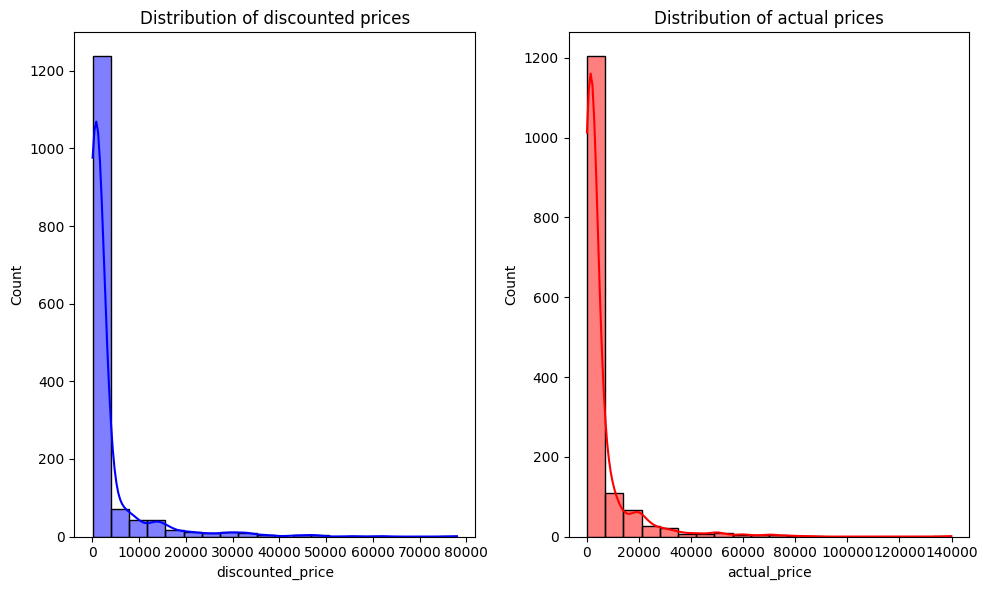

In [ ]:
#What is the distribution of discounted prices vs. actual prices
#plotting histogram for both the columns
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(data=df['discounted_price'],kde=True,bins=20,color='b')
plt.title('Distribution of discounted prices')

plt.subplot(1,2,2)
sns.histplot(data=df['actual_price'],kde=True, bins=20, color='r')
plt.title("Distribution of actual prices")

plt.tight_layout()
plt.show()


In [ ]:
# Summary statistics for discounted_price
df['discounted_price'].describe()

count     1465.000000
mean      3125.310874
std       6944.304394
min         39.000000
25%        325.000000
50%        799.000000
75%       1999.000000
max      77990.000000
Name: discounted_price, dtype: float64

In [ ]:
# Summary statistics for actual price
df['actual_price'].describe()

count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price, dtype: float64

Question 5 What are the most popular product names?


In [ ]:
#Top 10 Product_name with maximum count of user_id
top_10_products=df.groupby('product_name')['user_id'].count().sort_values(ascending=False).head(10)

Question 6  What are the most popular product keywords?
"""How to find the most popular key word, without having search keywords ?"""

Question:7 What are the most popular product reviews?

Answer: To answer such questions, we need to look at the numnber of likes or views received by the reviews

Question: 8 What is the correlation between discounted_price and rating?

In [ ]:
correlation=df['discounted_price'].corr(df['rating'])

In [ ]:
correlation

0.12033741712288548

Question: What are the Top 5 categories based on the highest ratings?

In [ ]:
df.groupby(df['category'])['rating'].mean().sort_values(ascending=False).head(5)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64

Question 10:  Identify any potential areas for improvement or optimization based on the data analysis

# **"Spotify Data: Popular Hip-hop Artists and Tracks**

In [ ]:
sf=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spotify.csv")

In [ ]:
sf.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [ ]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [ ]:
sf['Artist'].unique()

array(['Drake', 'Travis Scott', 'Post Malone', 'Noah Kahan',
       'Nicki Minaj', 'Justin Bieber', 'Jessie J', 'KAROL G', '21 Savage',
       'Metro Boomin', 'SZA', 'Jack Harlow', 'Jung Kook', 'Lil Nas X',
       'Lyrical Lemonade', 'Future', 'Don Toliver', 'Lil Wayne', 'Yeat',
       'Eminem', 'Kendrick Lamar', 'Baby Keem', 'The Weeknd', 'JAY-Z',
       'Cardi B', 'Bruno Mars', 'Ed Sheeran', 'GloRilla', 'Gunna',
       'Lil Baby', 'Internet Money', 'Sarz', 'J. Cole', 'Lil Durk',
       'cassö', 'D-Block Europe', 'Clavish', 'Latto', 'Young Nudy',
       'Megan Thee Stallion', 'NEIKED', 'Snoop Dogg', 'Dr. Dre',
       'benny blanco', 'Young Thug', 'Chris Brown', 'Dave', 'Central Cee',
       'The Kid LAROI', 'Quevedo', 'Bizarrap', 'Anuel AA', 'SAIKO',
       'David Guetta', 'Coi Leray', 'Pressa', 'Fivio Foreign', 'RAYE',
       'French Montana', 'Arizona Zervas', 'Pharrell Williams',
       'XXXTENTACION', 'Kane Brown', 'Ellie Goulding', 'Reneé Rapp',
       'Maroon 5', 'DJ Snake', 'Qu

Question: 1 Identify the top 5 popular artists based on the mean popularity of their tracks.Show the mean popularity of

 tracks for the top 5 popular artists Using BarPlot.


In [ ]:
sf.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64

Question 2:  Determine the top 5 popular songs based on their popularity ratings.Display the popularity ratings of the top 5 popular songs using BarPlot.

<Axes: xlabel='Track Name', ylabel='Popularity'>

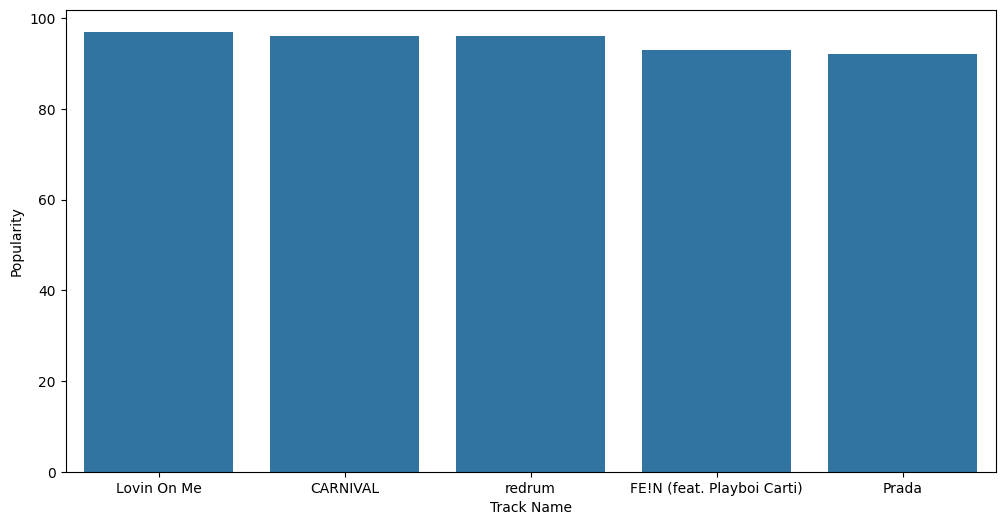

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=sf.groupby('Track Name')['Popularity'].max().sort_values(ascending=False).head(5))

Question 3: Find the top 5 trending genres based on the mean popularity of tracks within each genre.Visualize the mean
 popularity of tracks for the top 5 trending genres.

In [ ]:
# Answers: Genres is missing in the data

Question 4:  Identify the top 5 longest songs among the tracks of the top 5 popular artists.Represent the duration of the top 5 longest songs among the tracks of the top 5 popular artists using BarPlot.

In [ ]:
# Top five artist by the highest mean popularity
top_five_artist=sf.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)

In [ ]:
top_five_artist

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64

In [ ]:
#  Identify the top 5 longest songs among the tracks of the top 5 popular artists.Represent the duration of the top 5 longest songs among the tracks of the top 5 popular artists using BarPlot.
top_five_artist_duration=sf.groupby('Artist')[['Popularity','Duration (ms)']].mean().sort_values(ascending=False, by='Popularity').head(5)

In [ ]:
top_five_artist_duration

,Popularity,Duration (ms)
Artist,,
cassö,92.000000,132359.000000
Trueno,89.000000,219201.000000
David Guetta,87.000000,140017.000000
Travis Scott,87.000000,269007.916667
¥$,86.090909,208035.454545


Question 4: Identify the top 5 longest songs among the tracks of the top 5 popular artists.Represent the duration of the top 5 longest songs among the tracks of the top 5 popular artists using BarPlot.

In [ ]:
top_artist=top_five_artist_duration.reset_index()

<Axes: xlabel='Artist', ylabel='Duration (ms)'>

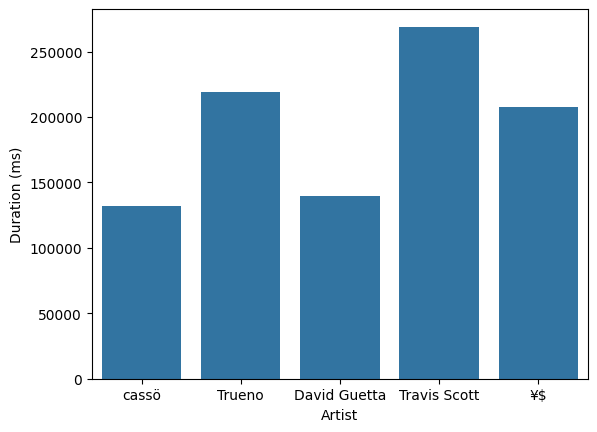

In [ ]:
sns.barplot(x=top_artist["Artist"],y=top_artist["Duration (ms)"])

Question: Determine the top 5 most danceable songs based on their danceability scores.Illustrate the danceability scores of the top 5 most danceable songs using PieChart

Answer: No such data provided with the data set